# Data Challenge


In [243]:
# @ Lukman 

In [21]:
# for data frame analysis
import pandas as pd 

# for mathematical operations
import numpy as np 

# imports below are for plotly 
import ipywidgets as widgets
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)   # for offline mode use
import plotly.figure_factory as ff
import plotly.offline as offline


# matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# For Normalizing data
from sklearn.preprocessing import StandardScaler

# For statistical test
import scipy.stats as stats

# Split data set into training and test set
from sklearn.model_selection import train_test_split as tts

# SVN module
from sklearn import svm

# Kernel Functions used 
from sklearn.metrics.pairwise import rbf_kernel,laplacian_kernel

# module for chi square test
from scipy.stats import chisquare

### To make Bokeh Plot 
import map_maker

# For dictionary 
from collections import defaultdict


ModuleNotFoundError: No module named 'map_maker'

# Data Preprocessing 

In [5]:
# Import the dataset 
# skip 2 rows since 
OutputData = pd.read_excel('population.xlsx',skiprows=range(0, 2)) 

In [6]:
OutputData = pd.read_csv('sales_technical_test.csv') 

In [7]:
# data types are objects
OutputData.dtypes

timestamp    object
tot           int64
storeId       int64
dtype: object

In [8]:
# chnage timestamo to date time data type
OutputData['timestamp'] =  pd.to_datetime(OutputData['timestamp'])
OutputData.dtypes

timestamp    datetime64[ns]
tot                   int64
storeId               int64
dtype: object

In [9]:
OutputData.dtypes # check the data type has changed

timestamp    datetime64[ns]
tot                   int64
storeId               int64
dtype: object

In [10]:
OutputData.set_index('timestamp',inplace=True);


In [11]:
storeOne = OutputData.loc[OutputData['storeId'] == 1] # store one
storeTwo = OutputData.loc[OutputData['storeId'] == 2] # store two

In [12]:
# Usually one would also need to read about the data collection process . This is so as to understand what each
# column and headers stands for. And in particular what assumptions have been made by the collectors
# of the data.

### Modelling with LSTM

In [13]:
storeTwo_arima = storeTwo.drop('storeId', 1)
storeTwo_arima['tot'] = storeTwo_arima['tot'].astype(float) # for compuational compatibitlity

In [14]:
storeOne_arima = storeOne.drop('storeId', 1)
storeOne_arima['tot'] = storeOne_arima['tot'].astype(float)


In [15]:
storeOneList = storeOne_arima.tot.tolist() # convert store one to list

In [4]:

# Taken from https://github.com/openai/baselines/blob/master/baselines/ddpg/noise.py, which is
# based on http://math.stackexchange.com/questions/1287634/implementing-ornstein-uhlenbeck-in-matlab
import numpy as np
class OrnsteinUhlenbeckActionNoise:
    def __init__(self, mu, sigma=0.3, theta=.15, dt=1e-2, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset()

    def __call__(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + \
                self.sigma * np.sqrt(self.dt) * np.random.normal(size=self.mu.shape)
        self.x_prev = x
        return x

    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros_like(self.mu)

    def __repr__(self):
        return 'OrnsteinUhlenbeckActionNoise(mu={}, sigma={})'.format(self.mu, self.sigma)


In [5]:
action = OrnsteinUhlenbeckActionNoise(mu=np.zeros(4))

In [6]:
sample_data[0] + action()

NameError: name 'sample_data' is not defined

In [7]:
sample_data[0]

NameError: name 'sample_data' is not defined

In [8]:
## Sample the data from gaussian distribution
action()

array([ 0.01940272, -0.00717119, -0.03092837,  0.00226771])

In [9]:
## sample_data[0].reshape(4,1).ndim

In [10]:

counter=0
def dataGetter(datalist):
    """
    Returns a single sales value.
    Input: Sales Data list named 
    Output: single Sales value
    """
    global counter;
    assert type(datalist) == list;
    
    
    value = datalist[counter]
    #print(counter)


    counter = counter +1
             
    return np.array([value])

In [11]:
# Define window size or learning
sliding_window = []
lag=8 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    sliding_window.append(dataGetter(storeOneList))

NameError: name 'storeOneList' is not defined

In [12]:
def get_pair(Target):
    """
    Returns an (current, target) 
    Target is lag steps 24 ahead of current
    """
 
    global sliding_window
    sliding_window.append(dataGetter(Target))
    #print(len(sliding_window))
    
    input_value = sliding_window[0:7]
    
    input_value=np.array(input_value)
    #print(input_value.shape)
    input_value=np.reshape(input_value,(1,7))
    ##print(input_value)
    output_value = sliding_window[-1]
    ##print(output_value)
    sliding_window = sliding_window[1:]
    #print(len(sliding_window))
    return input_value, output_value.reshape(1,)

In [13]:
# for data frame analysis
import pandas as pd 

# for mathematical operations
import numpy as np 

# imports below are for plotly 
import ipywidgets as widgets
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)   # for offline mode use
import plotly.figure_factory as ff
import plotly.offline as offline


# matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# For Normalizing data
from sklearn.preprocessing import StandardScaler

# For statistical test
import scipy.stats as stats


In [14]:

#Imports
import tensorflow as tf
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *

/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [15]:
#Input Params
with tf.name_scope("input_target_placeholders"):    
    input_dim = 1
    ##The Input Layer as a Placeholder
    #Since we will provide data sequentially, the 'batch size'
    #is 1.
    action_space_dim = 11
    input_layer = tf.placeholder(tf.float32, [1,action_space_dim],name="input_data")
    correct_output = tf.placeholder(tf.float32, [1,4],name="target_data")

#Input Params
with tf.name_scope("input_target_placeholders"):    
    input_dim = 1
    ##The Input Layer as a Placeholder
    #Since we will provide data sequentially, the 'batch size'
    #is 1.
    input_layer = tf.placeholder(tf.float32, [1, input_dim*7],name="input_data")
    correct_output = tf.placeholder(tf.float32, [input_dim],name="target_data")

with tf.variable_scope("lstmLayer",reuse=tf.AUTO_REUSE ):    
    lstm_layer1 = rnn_cell.BasicLSTMCell(input_dim*1026,state_is_tuple=False)
    #lstm_layer1 = rnn_cell.BasicLSTMCell(input_dim*1,state_is_tuple=True)

    #The LSTM state as a Variable initialized to zeroes
    lstm_state1 = tf.Variable(tf.zeros([1, lstm_layer1.state_size]),trainable=False,name="initial_state")
    #lstm_state1 = tf.Variable(lstm_layer1.zero_state(1,lstm_layer1.state_size[-1] ), trainable=False)
    #Connect the input layer and initial LSTM state to the LSTM cell
    lstm_output1, lstm_state_output1 = lstm_layer1(input_layer, lstm_state1)
    #The LSTM state will get updated
    outputs = lstm_state1.assign(lstm_state_output1)

In [16]:
with tf.variable_scope("lstmLayer",reuse=tf.AUTO_REUSE ):    
    lstm_layer1 = rnn_cell.LSTMCell(1026,state_is_tuple=False,name='basic_lstm_cell')
    #lstm_layer1 = rnn_cell.BasicLSTMCell(input_dim*1,state_is_tuple=True)

    #The LSTM state as a Variable initialized to zeroes
    lstm_state1 = tf.Variable(tf.zeros([1, lstm_layer1.state_size]),trainable=False,name="initial_state")
    
    #lstm_state1 = tf.Variable(lstm_layer1.zero_state(1,lstm_layer1.state_size[-1] ), trainable=False)
    #Connect the input layer and initial LSTM state to the LSTM cell
    lstm_output1, lstm_state_output1 = lstm_layer1(input_layer, lstm_state1)
    #The LSTM state will get updated
    outputs = lstm_state1.assign(lstm_state_output1)

In [17]:
lstm_output1

<tf.Tensor 'lstmLayer/basic_lstm_cell/mul_2:0' shape=(1, 1026) dtype=float32>

In [18]:
2**11

2048

In [19]:
2052

2052

In [20]:
input_layer

<tf.Tensor 'input_target_placeholders/input_data:0' shape=(1, 11) dtype=float32>

In [21]:
correct_output

<tf.Tensor 'input_target_placeholders/target_data:0' shape=(1, 4) dtype=float32>

In [22]:
lstm_output1.shape

TensorShape([Dimension(1), Dimension(1026)])

In [46]:
with tf.name_scope("weight_Bias_learning_rate"):
    global_step = tf.Variable(0, trainable=False,name="global_step")
    starter_learning_rate = 1e-3
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           1000, 0.8, staircase=False,name ="Exponential_decay")
    ##The Regression-Output Layer
    #The Weights and Biases matrices first
    output_W1 = tf.Variable(tf.truncated_normal([int(lstm_output1.shape[1]),4]),name="weight")
    output_b1 = tf.Variable(tf.truncated_normal([4]),name="bias")


In [47]:
with tf.name_scope("prediction"):
    #Compute the output
    final_output = tf.matmul(lstm_output1, output_W1) + output_b1

In [48]:
final_output

<tf.Tensor 'prediction_1/add:0' shape=(1, 4) dtype=float32>

In [49]:

lambda_l2_reg=0.5 
l2 = lambda_l2_reg * sum( tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables() if not ("noreg" in tf_var.name or "bias" in tf_var.name) )

In [50]:

with tf.name_scope("RMS_error"):
    ##Calculate the Sum-of-Squares Error
    error = tf.pow(tf.subtract(final_output, correct_output), 2)+l2

In [51]:
with tf.variable_scope("optimizer",reuse=tf.AUTO_REUSE ):    
    ##The Optimizer
    #Adam works best
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)

In [52]:
# Create a summary to monitor MSE
mse=tf.summary.tensor_summary("errors_Summary",error)
# Create a summary to monitor  predictions
prediction=tf.summary.tensor_summary("predictions_Summmary", final_output)
# Create a summary to monitor bias
bias_vec=tf.summary.tensor_summary("bias", output_b1)
# create sumary
#rate_vec=tf.summary.scalar("rate", learning_rate)


#histogram plot

error_stats=tf.summary.histogram("errors_Histogram",error)
weight_stats=tf.summary.histogram("weights_Histogram",output_W1)
bias_stats=tf.summary.histogram("biases_Histogram",output_b1)
#learning_stats=tf.histogram_summary("biases_Histogram",learning_rate)


#merged_summary_op =  tf.merge_all_summaries()
merged_summary_op =   tf.summary.merge([mse,prediction,bias_vec,error_stats,weight_stats,bias_stats])

In [53]:
##Session
sess = tf.Session()
#Initialize all Variables
sess.run(tf.global_variables_initializer())

In [54]:
#logs_path = './lstm/'


##Training Parameters
n_iter = 720 
inner_iter = 720
actual_output1 = []
network_output1 = []
validation_prediction=[];
validation_target =[];
lower_bound=0;
upper_bound=700;
prediction_window=7


import copy
#new_list = copy.deepcopy(old_list)
Test_eval=copy.deepcopy(storeOneList[720:])


sliding_window

In [55]:

mu, sigma = 0, 0.1 # mean and standard deviation
sample_action = lambda mu, sigma, action_dim: np.random.normal(mu, sigma, action_dim)
sample_data = [sample_action(mu, sigma, 7) for x in range(100) ]
target = [sample_action(mu, sigma, 4) for x in range(100) ]
sample_data[0]

array([ 0.09408581,  0.02444745,  0.05510224,  0.09477388, -0.13352903,
       -0.02152792, -0.07569873])

In [56]:
mu, sigma = 0, 0.1 # mean and standard deviation
sample_action = lambda mu, sigma, action_dim: np.random.normal(mu, sigma, action_dim)
train = [sample_action(mu, sigma, 7) for x in range(50) ]
train_act = [sample_action(mu, sigma, 4) for x in range(50) ]

In [57]:
train_act[0]

array([-0.03211867, -0.00892193,  0.04252648,  0.03840397])

In [58]:
import random
train_index= random.randint(0,len(train))
#k = random.choice(0,len(train))
train_index

18

In [59]:
#[np.array_equal(k,x) for x in train].index(True)


In [60]:
train[49]

array([ 0.04912855, -0.02790943,  0.06007348, -0.06663669,  0.11416862,
        0.08130638, -0.0910352 ])

In [61]:
def counter(loop_count,sample_size):
    if loop_count < sample_size:
        return loop_count
    else:
        loop_count = random.randint(0,sample_size)
        return loop_count
    

In [62]:
from tqdm import tqdm

#### for range dont use 2 for loops
#### random sampleing from data set
error_=[]
n_iter = len(sample_data)-2
iterations = 500
inner_iter = 10
#tf.summary.FileWriter
#eval_index 
#writer = tf.summary.FileWriter(logs_path, graph= tf.get_default_graph()) 
actual_output1 = []
network_output1 = []
validation_target = []
validation_prediction = []


for i in tqdm(range(iterations)):
            data_index = counter(i,n_iter)
            previous_action = target[data_index] + action()
            prevous_state = sample_data[data_index]
            state_action_input = np.hstack((prevous_state,previous_action)).reshape(1,11)
            action_target= target[data_index+1].reshape(1,4)
            _, _, network_output,errors,summary = sess.run([outputs,
                                         train_step,
                                         final_output,error,merged_summary_op],
                                        feed_dict = {
                                            input_layer: state_action_input,
                                            correct_output:action_target})
            #writer.add_summary(summary)
            #error_.append(errors)
            
            if i%inner_iter==0:
                #print(i)
                #assert i!=0;
                sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))

                #for j in range(len(Test_eval[lower_bound:upper_bound])):
                    #input_val, output_val = get_pair(Test2)
                eval_index = random.randint(0,len(train)-2)
                input_val = np.hstack((train[eval_index],train_act[eval_index]))
                output_val = train_act[eval_index+1]
                #print(output_val)
                _, network_output_val = sess.run([outputs,
                                          final_output],
                                         feed_dict = {
                                         input_layer: input_val.reshape(1,11),
                                         correct_output: output_val.reshape(1,4)})
                #lower_bound= lower_bound+prediction_window;
                #upper_bound = upper_bound + prediction_window;
                validation_target.append(output_val)
                validation_prediction.append(network_output_val.reshape(4,))
            #sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))

            actual_output1.append(sample_data[data_index+1])
                #actual_output2.append(output_v[0][1])
            network_output1.append(network_output)
                #network_output2.append(network_output[0][1])
                #x_axis.append(i)

100%|██████████| 500/500 [00:17<00:00, 29.21it/s]


In [63]:
validation_prediction


[array([ 0.10843679, -0.5029556 ,  1.0012134 ,  1.0214958 ], dtype=float32),
 array([ 0.02844252, -0.4044903 ,  0.55051506,  0.7322998 ], dtype=float32),
 array([ 0.33268133, -0.52787244,  1.0013658 ,  1.1815529 ], dtype=float32),
 array([ 0.23281196, -0.20932126,  0.4789287 ,  0.67821234], dtype=float32),
 array([-0.18706009, -0.44102556,  0.73941344,  0.87635076], dtype=float32),
 array([ 0.29057685, -0.45247066,  0.6154094 ,  0.948714  ], dtype=float32),
 array([-0.05771306, -0.3933078 ,  0.7936837 ,  0.9137003 ], dtype=float32),
 array([ 0.30912304, -0.38133433,  0.5741607 ,  0.8182243 ], dtype=float32),
 array([ 0.11963854, -0.6870034 ,  0.6675333 ,  1.1286012 ], dtype=float32),
 array([-0.0968862 , -0.21729627,  0.95382   ,  0.66798466], dtype=float32),
 array([ 0.07687119, -0.5732172 ,  0.74742305,  1.01329   ], dtype=float32),
 array([ 0.10222481, -0.48294124,  0.7479076 ,  1.0952066 ], dtype=float32),
 array([ 0.07560231, -0.303231  ,  0.79347086,  0.82117504], dtype=float32),

In [64]:
validation_target

[array([ 0.02077887, -0.09171257,  0.11800379,  0.18928013]),
 array([ 0.01018582, -0.04784613, -0.16851224, -0.01055582]),
 array([-0.23417463, -0.24276541, -0.01842355, -0.10425959]),
 array([-0.07687815, -0.00544664,  0.12641366,  0.01645737]),
 array([-0.05673169, -0.07246183, -0.15123012,  0.08153634]),
 array([-0.01682042,  0.06907857, -0.07439026, -0.00339843]),
 array([ 0.11382261, -0.00810905, -0.12113273,  0.07722559]),
 array([ 0.069467  , -0.09155838,  0.14273009,  0.05002478]),
 array([ 0.1600872 , -0.14219879, -0.17609195,  0.03513876]),
 array([-0.0512838 ,  0.06597497,  0.10716858, -0.08119034]),
 array([-0.07687815, -0.00544664,  0.12641366,  0.01645737]),
 array([-0.05673169, -0.07246183, -0.15123012,  0.08153634]),
 array([ 0.02424223,  0.16389929, -0.0666137 ,  0.10236802]),
 array([ 0.08215281, -0.17907243, -0.10300319,  0.12565963]),
 array([-0.05229789, -0.11001369, -0.0820013 , -0.08757573]),
 array([-0.07111848,  0.12441613, -0.0809787 , -0.09648751]),
 array([

/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



Text(0.5,0,'Training example')

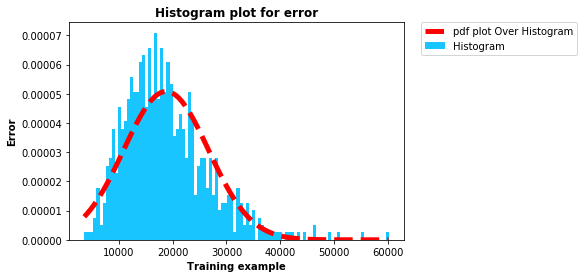

In [218]:
import matplotlib.mlab as mlab

fig, ax = plt.subplots()
n, bins, patches=plt.hist(errorplot.reshape(700,),100,normed=1,facecolor='deepskyblue',alpha=0.9,label='Histogram')
mu= np.mean(errorplot);sigma=np.std(errorplot);
y = mlab.normpdf( bins,mu,sigma)
#y = mlab.normpdf( bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=5,label="pdf plot Over Histogram")
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Histogram plot for error",fontweight='bold')
plt.ylabel("Error",fontweight='bold')
plt.xlabel("Training example",fontweight='bold')

# Preditionsm

In [219]:
validation_set = storeOneList[721:]
counter = 0 # reset counter 
sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [220]:
actual_output_test = []
network_output_test = []

 
for i in range(len(validation_set)):
    input_v, output_v = get_pair(validation_set)
    #print(input_v, output_v)
    _, network_output = sess.run([outputs,
                                  final_output],
                                 feed_dict = {
                                     input_layer: input_v,
                                     correct_output: output_v})
        
 
    actual_output_test.append(output_v)
    #print(network_output)
    network_output_test.append(network_output)

In [221]:
np.array(network_output_test).shape

(40, 1, 1)

<Figure size 2160x144 with 0 Axes>

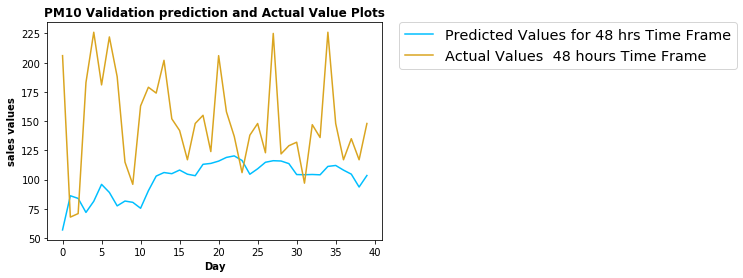

In [222]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( np.array(network_output_test).reshape(40,1), 'r-',color = 'deepskyblue',label='Predicted Values for 48 hrs Time Frame')
ax.plot( np.array(actual_output_test).reshape(40,1), 'b-',color = 'goldenrod',label='Actual Values  48 hours Time Frame')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='x-large')
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")


plt.title("PM10 Validation prediction and Actual Value Plots",fontweight='bold')
#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
plt.ylabel("sales values",fontweight='bold')
plt.xlabel("Day",fontweight='bold')

#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

# Testing 

In [223]:

n_list = 28;
Feature_eval=copy.deepcopy(Test_eval[-7:])

In [224]:
def get_pair_Test(Target):
    """
    Returns an (current, target) 
    Target is lag steps 24 ahead of current
    """
 
    
    global sliding_window_test
    #sliding_window_test.append(dataGetter(Target))
    #print(len(sliding_window))
    #sliding_window_featureset.append(dataGetter_target(Target2))
    
    #input_value = sliding_window_test
    
    
    input_value=np.array(sliding_window_test)
    #print(input_value.shape)
    
    #print(input_value.shape)
    input_value=np.reshape(input_value,(1,len(sliding_window_test)))
    mx = np.ma.masked_invalid(input_value)
    
    ##print(input_value)
    #output_value = sliding_window[-1]
    #my = np.ma.masked_invalid(output_value)
    ####remove last value from sliding_window
    #_ = sliding_window_featureset[-1]
    ##print(output_value)
   # sliding_window = sliding_window[1:]
    #sliding_window_featureset = sliding_window_featureset[1:]
    #print(len(sliding_window))
    # Process output
    mask_x = ~mx.mask # let mask return true for those non-nan values
    ## y output
    #mask_y =~my.mask
    #mask_yfloat = mask_y
    return input_value

In [225]:
counter_test=0;
def dataGetter_test(datalist):
    """
    Returns a single PM10 value.
    Input: PM10 Data list named Target_list above
    Output: single PM10 value
    """
    global counter_test;
    assert type(datalist) == list;
    
    
    value = datalist[counter_test]
    #print(counter)


    counter_test = counter_test +1
             
    return value

In [226]:

previous_sliding_window_length=28;
time_step_shift = 7;

In [227]:
#sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])));


In [228]:
sliding_window_test = []
lag=8 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    temp=dataGetter_test(Feature_eval)
    
    sliding_window_test.append(temp);

In [229]:
 
sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [230]:

#actual_output_test = []
network_output_test = []

 
for i in range(previous_sliding_window_length):
   
    input_v = get_pair_Test(sliding_window_test)
    _, network_output = sess.run([outputs,
                                  final_output],
                                 feed_dict = {
                                     input_layer: input_v})
       
    
    sliding_window_test.append( network_output[0]) # append new values for prediction
    #print(len(sliding_window_test))
    sliding_window_test.pop(0) # remove the first value of the list 
    #print(len(sliding_window_test))
    time_step_shift = time_step_shift + 1; # increae the time step
    network_output_test.append(network_output)

In [231]:
#network_output_test

<Figure size 2160x144 with 0 Axes>

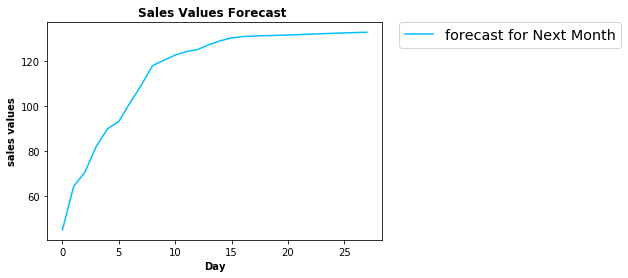

In [239]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( np.array(network_output_test).reshape(28,1), 'r-',color = 'deepskyblue',label='forecast for Next Month')
#ax.plot( np.array(actual_output_test).reshape(40,1), 'b-',color = 'goldenrod',label='Actual Values  48 hours Time Frame')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='x-large')
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")


plt.title("Sales Values Forecast ",fontweight='bold')
#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
plt.ylabel("sales values",fontweight='bold')
plt.xlabel("Day",fontweight='bold')

#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

In [237]:
forecast= list(np.array(network_output_test).reshape(28)) # save forecast as list

In [240]:
# save model
xlabels = pd.date_range(start='2/1/2019', end='2/28/2019')

lstm_store_1 = pd.DataFrame(list(zip(xlabels, forecast, [1]*28)), 
               columns =['timestamp', 'Sales Forecast','storeId']) 

lstm_store_1.to_csv('lstm_store_1_forecast', sep=',')

In [241]:
# Only store 1 is presented here with LSTM.
# The same pipeline follows here for store 2 

# Conclusion
LSTM works fine on Time series but one needs care so that things do not blow up.
On a very suphiscated machine, this model could work impeccably well.
ARIMA,SARIMA are also very powerful models but they have less representational power compared to lstm
